### FLOWER RECOGNITION - CNN | Keras


In [1]:
!pip install tensorflow==1.15
import tensorflow.compat.v2 as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 3.8 MB 46.2 MB/s 
     |████████████████████████████████| 503 kB 44.2 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=49265625f989d21e013f9060ac9abb732c5f9e711bc2e2fd5a4bfbde0b8f4b58
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

Import Libraries

In [2]:
## Importing all the necessary libraries

!pip3 uninstall keras-nightly
!pip3 uninstall -y tensorflow
!pip3 install keras==2.1.6
!pip3 install tensorflow==1.15.0
!pip3 install h5py==2.10.0

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


Found existing installation: tensorflow 1.15.0
Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 339 kB 2.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 2.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


Using TensorFlow backend.


Load Data


In [3]:
## Initializing empty dictonaries for using them as dependent and independent sets later
X=[]
Z=[]
IMG_SIZE=150

## importing data into seperate variable as per the name of flowers

FLOWER_DAISY_DIR='/content/drive/MyDrive/Data - Flower Recognition CNN/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/Data - Flower Recognition CNN/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/Data - Flower Recognition CNN/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/Data - Flower Recognition CNN/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/Data - Flower Recognition CNN/flowers/rose'

In [4]:
## Function to assign lables to the flower image

def assign_label(img,flower_type):
    return flower_type

In [5]:
## Function to create training data with names of the flowers as lebles using pre defined function

def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [6]:
## Creating training data for each type of flower

make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 764/764 [00:25<00:00, 30.03it/s] 


764


100%|██████████| 733/733 [00:13<00:00, 54.20it/s] 


1497


100%|██████████| 984/984 [00:19<00:00, 49.50it/s] 


2481


100%|██████████| 1052/1052 [00:20<00:00, 52.52it/s] 


3533


100%|██████████| 784/784 [00:23<00:00, 33.59it/s] 

4317


Print Ramdom Input Images with Flower names as lables

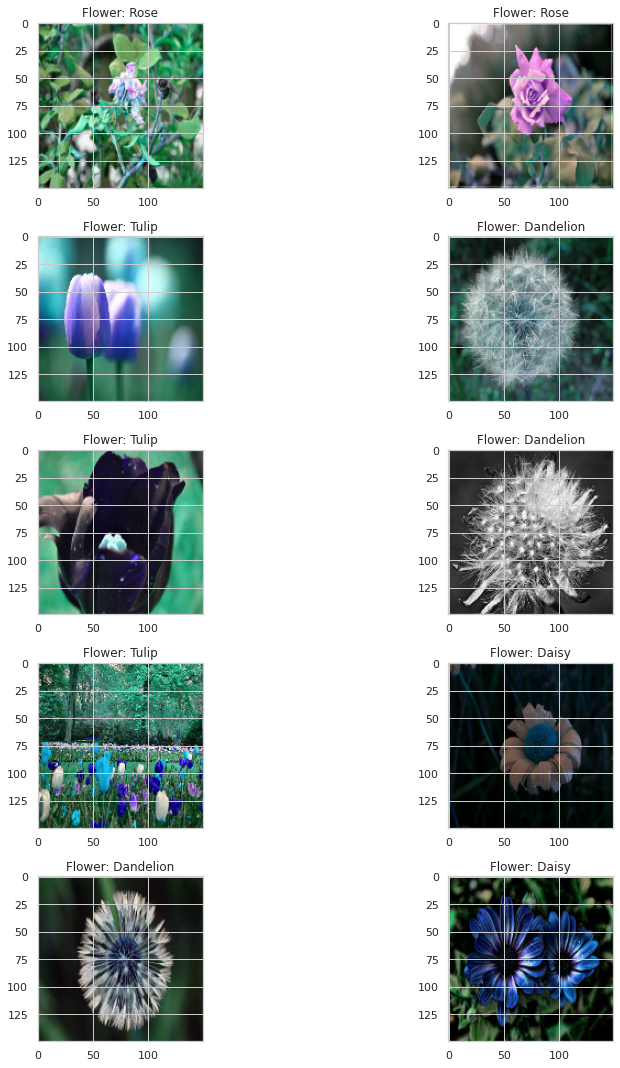

In [7]:
## Print some random input images from our training dataset

fig, ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
  for j in range(2):
    l = rn.randint(0,len(Z))
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Flower: ' + Z[l])

plt.tight_layout()

Encoding and scaling of categorical data to make it model friendly

In [8]:
## Encode categorical data

le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,5)

## Convert input data into an array and scale down the pixels
X = np.array(X)
X = X/255

Test - Train Split

In [9]:
## Perform test-train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 50)

In [10]:
## Print independent features of the train data
x_train

array([[[[0.01568627, 0.04313725, 0.03137255],
         [0.1254902 , 0.27058824, 0.22745098],
         [0.22352941, 0.35686275, 0.29411765],
         ...,
         [0.01568627, 0.00392157, 0.00392157],
         [0.01176471, 0.        , 0.        ],
         [0.        , 0.00392157, 0.00392157]],

        [[0.03137255, 0.00392157, 0.00784314],
         [0.        , 0.03137255, 0.01568627],
         [0.05098039, 0.09019608, 0.0627451 ],
         ...,
         [0.01176471, 0.        , 0.00392157],
         [0.00392157, 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02352941, 0.        , 0.00784314],
         [0.01568627, 0.02352941, 0.01960784],
         [0.01568627, 0.01568627, 0.00784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.        , 0.        ]],

        ...,

        [[0.0627451 , 0.25490196, 0.09019608],
         [0.01176471, 0.16862745, 0.03137255]

In [11]:
## Print target feature of the train data
y_train

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [12]:
import numpy as np
import tensorflow as tf    

np.random.seed(42)
rn.seed(42)
# tf.random.set_seed(42)
tf.random.set_random_seed(42)

Model Building -  CNN architecture design

In [13]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [14]:
batch_size = 128   #learning set
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

Data Augmentation - Helps Avoiding Overfitting

In [15]:
## Perform data augmentation to avoid overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [16]:
## Compile the CNN
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
## Print Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)        83040     
__________

Model Fitting

In [ ]:
## Fit the CNN model to your data and print the loss and accuracy for both the test and train dataset
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





Epoch 1/50


23/23 [==============================] - 203s 9s/step - loss: 1.5017 - acc: 0.3265 - val_loss: 1.3558 - val_acc: 0.3773
Epoch 2/50
23/23 [==============================] - 186s 8s/step - loss: 1.2224 - acc: 0.4804 - val_loss: 1.1353 - val_acc: 0.5463
Epoch 3/50
23/23 [==============================] - 185s 8s/step - loss: 1.0736 - acc: 0.5706 - val_loss: 1.0324 - val_acc: 0.6065
Epoch 4/50
23/23 [==============================] - 186s 8s/step - loss: 1.0137 - acc: 0.5942 - val_loss: 1.0680 - val_acc: 0.5887
Epoch 5/50
23/23 [==============================] - 187s 8s/step - loss: 0.9623 - acc: 0.6146 - val_loss: 0.9378 - val_acc: 0.6312
Epoch 6/50
23/23 [==============================] - 183s 8s/step - loss: 0.9251 - acc: 0.6243 - val_loss: 0.8985 - val_acc: 0.6343
Epoch 7/50
23/23 [==============================] - 183s 8s/step - loss: 0.8669 - acc: 0.6662 - val_loss: 0.9329 - val_acc: 0.6481
Epoch 8/50
23/23 [==============================] - 190s 8s/step - loss: 0.8851 - acc: 0.6427 

Visualization

In [ ]:
## Print the loss graph for test and train data set

plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
model.metrics_names

acc = History.history['acc']
val_acc = History.history['val_acc']

In [ ]:
## Print the accuracy graph for test and train data set

plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

CNN model Optimization

In [ ]:
# # optimize the previous model

model_1 = Sequential()
model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model_1.add(MaxPooling2D(pool_size=(2,2)))


model_1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model_1.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(5, activation = "softmax"))

In [ ]:
batch_size = 128   #learning set
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
model_1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_1.summary()

In [ ]:
## Fit the new model to attain better accuracy
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 25, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

In [ ]:
## Print the loss graph for test and train data set for optiized CNN model

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
## Print the accuracy graph for test and train data set for optiized CNN model
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model_1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
# getting predictions on val set.
pred=model_1.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

Printing the Predictions from the model

In [ ]:
# Sory some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [ ]:
## Print properly classified images

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        # ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

In [ ]:
## Print mis-classified images

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        # ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        ax[i,j].set_title("Predicted Flower :"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

In [ ]:
model_1.save('my_model.h5')

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf 

st.set_option('deprecation.showfileUploaderEncoding', False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model.h5')
  return model
model=load_model()
st.write("""
          # Flower Classification
          """)

file = st.file_uploader("Please upload a Flower Image" , type=["jpg","png"])

import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
  size = (150,150)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]
  prediction = model.predicting(img_reshape)

  return prediction

if file in None:
  st.text("Please Upload an Image File")
else:
  image = Image.open(file)
  st.image(image, use_column_width=True)
  predictions = import_and_predict(image , model)
  class_names = ['Daisy', 'Dandelion', 'Rose' , 'Sunflower', 'Tulip']
  string = "The Flower in the Image is most likely is : "+class_name[np.argmax(predictions)]
  st.success(string)



In [ ]:
# !streamlit run app.py

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2FfSUJD2WHbtTtEhP2vlvVA8MVn_87qWPdcDmnCkfvkVgZkHx

In [ ]:
!nohup streamlit run app.py &

In [ ]:
# from pyngrok import ngrok
# url = ngrok.connect(port=8501)
# url

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501